<a href="https://colab.research.google.com/github/Tobaho/Tobaho.github.io/blob/main/Exam_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EXAM 1
#OLUWATOBI AFOLABI
#CPSMA 4313

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from google.colab import auth

For question 1, I will be using the data from  https://en.wikipedia.org/wiki/List of mountains by elevation

#Question a

In [ ]:
mountains = requests.get('https://en.wikipedia.org/wiki/List_of_mountains_by_elevation')
mountains = mountains.text
MountSoup = BeautifulSoup(mountains, 'lxml')
#print(MountSoup)  # for debug
MountTable = MountSoup.find_all('table', class_='wikitable sortable')
#print(MountTable)  # for debug
MountTable[0].find_all('a')
MountFrame = pd.read_html(str(MountTable))[0]
MountFrame

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8849,29032,Himalayas,Nepal/China
1,K2,8611,28251,Karakoram,Pakistan/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...


#Question B

To return only mountains in Himalays

In [ ]:
MountFrame.loc[MountFrame['Range']=='Himalayas']

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8849,29032,Himalayas,Nepal/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...
13,Shishapangma,8027,26335,Himalayas,China


#Question c

To create a bar chart of ranges

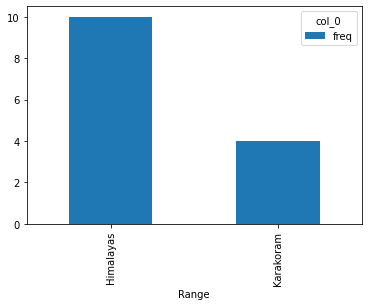

In [ ]:
pd.crosstab(MountFrame['Range'], columns = 'freq').plot(kind='bar')

#Question D

To create a box plot of height in feet

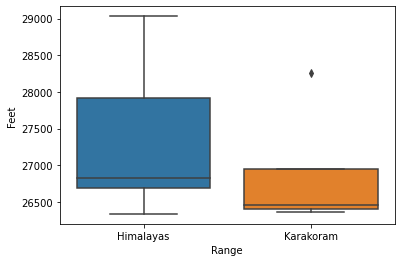

In [ ]:
sns.boxplot(data=MountFrame['Feet'],x=MountFrame['Range'],y=MountFrame['Feet'])

#Question E

To report the mean, standard deviation and five number summary of the height in Feet

In [ ]:
quartiles = np.percentile(MountFrame['Feet'],[25,50,75])
MinMax = MountFrame['Feet'].min(), MountFrame['Feet'].max()
print("mean: ",MountFrame['Feet'].mean())
print("standard deviation: ",np.std(MountFrame['Feet']))
print("min",MinMax[0])
print("Q1",quartiles[0])
print("median",quartiles[1])
print("Q3",quartiles[2])
print("max",MinMax[1])

mean:  27178.214285714286
standard deviation:  847.9655635335527
min 26335
Q1 26518.0
median 26788.0
Q3 27914.5
max 29032


#QUESTION F

To report the mean and median of mountains when grouped by their Range.


In [ ]:
MountFrame.groupby(by='Range').agg(['mean','median'])

Metres             Feet         
              mean  median     mean   median
Range                                       
Himalayas  8319.80  8177.5  27295.9  26829.5
Karakoram  8194.25  8065.5  26884.0  26461.5

#Part 2 sql

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


#Question A

I will look at the rows in the data set

In [ ]:
%%bigquery --project tobahodataviz
SELECT 
  COUNT(*) as total_rows
FROM `chicago taxi trips.taxi trips`

Executing query with job ID: f99cc064-19b1-4b8d-83cb-dc3b242a1228
Query executing: 0.42s


ERROR:
 400 Invalid dataset ID "chicago taxi trips". Dataset IDs must be alphanumeric (plus underscores and dashes) and must be at most 1024 characters long.

(job ID: f99cc064-19b1-4b8d-83cb-dc3b242a1228)

     -----Query Job SQL Follows-----     

    |    .    |    .    |    .    |
   1:SELECT 
   2:  COUNT(*) as total_rows
   3:FROM `chicago taxi trips.taxi trips`
    |    .    |    .    |    .    |


%%bigquery --project tobahodataviz
SELECT 
  COUNT(*) as total_rows
FROM ``

From the above, the link provided had no data sets to work with. I am just going to stop here  and move to the next question. 

In [ ]:
%%bigquery --project tobahodataviz
SELECT 
  COUNT(*) as total_rows
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`

,total_rows
0,198792903


Okay!! It worked! After going back and forth, stressing my poor brain out, I got the link to work. I am so proud of myself. 

In [ ]:
%%bigquery --project tobahodataviz
SELECT *
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
LIMIT 10

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,b8e0c2e280a66fd9ae089df2f4759d6a3b0be246,b2f6b3dd391f77e0791cae7943dae465cf9859b13c86e9...,2014-12-11 17:00:00+00:00,2014-12-11 17:00:00+00:00,0,0.0,None,None,None,None,7.85,1.00,0.0,0.0,8.85,Credit Card,Suburban Dispatch LLC,None,None,None,None,None,None
1,3e0ba7c63441a7277c4475c05fac1826d5825081,b1de4d4ce24ec1a8e9d0cd77d9aa3f7b340b8297297efd...,2015-02-05 20:30:00+00:00,2015-02-05 20:30:00+00:00,0,0.0,None,None,None,None,6.45,0.00,0.0,0.0,6.45,Credit Card,T.A.S. - Payment Only,None,None,None,None,None,None
2,b27a2815af3491b6004573250c890b55c0e64e77,ae0fb599586f950b7811c99713a56c03504a54c30c6cde...,2015-02-05 18:45:00+00:00,2015-02-05 18:45:00+00:00,0,0.0,None,None,None,None,13.65,2.73,0.0,0.0,16.38,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None
3,0cd7097adfa219daef29c655cc0c76bdbd2028df,07009b8e9b32f36656567f7809b970af38e59dbb58704a...,2015-02-07 03:45:00+00:00,2015-02-07 03:45:00+00:00,0,0.0,None,None,None,None,14.35,0.00,0.0,0.0,14.35,Credit Card,Suburban Dispatch LLC,None,None,None,None,None,None
4,26ee1435374aaefd2d8b21e2048780f315ddeece,b884dd3799982951b7b1293d92a3e6e90ba3483a6fdbf2...,2015-02-03 09:45:00+00:00,2015-02-03 09:45:00+00:00,0,0.0,None,None,None,None,8.25,2.06,0.0,0.0,10.31,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None
5,ee6ff0da50266a82bf524f55241d8924f9bbee1c,bac9df43d5a10e6645f1545702ab061747dffb1f9a62c5...,2014-12-14 16:45:00+00:00,2014-12-14 16:45:00+00:00,0,0.0,None,None,None,None,11.05,1.50,0.0,0.0,12.55,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None
6,76d0dae48e91f3c98844d20fcb092779acc33f7b,5c78e836fa4fd7ecadd6d3f7d9224f2af888dedeec3304...,2015-02-05 23:30:00+00:00,2015-02-05 23:30:00+00:00,0,0.0,None,None,None,None,26.45,6.61,0.0,0.0,33.06,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None
7,a1ebb56e2a57ff5474ea0d6ab70d82ec573c6cb9,ef5e9c8f0da412a5961a77ad3da965c641e08eb1ddd19f...,2014-08-30 16:30:00+00:00,2014-08-30 16:30:00+00:00,0,0.0,None,None,None,None,19.05,2.86,0.0,0.0,21.91,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None
8,89f141547dd59f4df3f91a94d8c744b550732cff,7ac5d62f7babdf58d4c3d1172abff990cca8253af6ad59...,2015-02-05 18:45:00+00:00,2015-02-05 18:45:00+00:00,0,0.0,None,None,None,None,9.85,1.97,0.0,0.0,11.82,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None
9,edfd9215f69bfa4ac83a5ec0c6f852b8e59368e9,4c8b6783201bdc422fd78043aceeea92a005af4c37bba7...,2015-01-31 03:00:00+00:00,2015-01-31 03:15:00+00:00,360,0.0,None,None,None,None,6.45,0.00,0.0,1.0,7.45,Cash,Blue Ribbon Taxi Association Inc.,None,None,None,None,None,None


#B

In [ ]:
%%bigquery --project tobahodataviz
SELECT payment_type, AVG(trip_total) as trip_total
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
GROUP BY payment_type

,payment_type,trip_total
0,No Charge,15.836177
1,Unknown,17.649893
2,Mobile,20.339910
3,Way2ride,16.639366
4,Split,18.788039
5,Dispute,15.496588
6,Pcard,10.116931
7,Credit Card,20.524892
8,Prcard,20.320682
9,Cash,12.265548


#C

In [ ]:
%%bigquery --project tobahodataviz
SELECT trip_seconds, max(trip_miles) as trip_miles
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
GROUP BY trip_seconds

,trip_seconds,trip_miles
0,1200.0,1820.0
1,6.0,704.5
2,4320.0,2740.0
3,4800.0,2860.0
4,321.0,95.7
...,...,...
41916,35057.0,0.0
41917,46193.0,0.0
41918,48642.0,0.0
41919,74362.0,0.0


I did not really understand the third question, Used my discretion. I made use trips_seconds and trips_miles. I hope i'm right.

#Question 3

#A
I worked on this exam for 4 hours. This is because I was experiencing an issue aunthenticating my SQL and getting the chicago data trips link to work. 
#B
The easiest was plotting the box plot. The hardest was the SQL question which I think should have been the easiest for me.
#C
I am excited to use sql to gather data. It was so unfortunate that it gave me a lot of probelms.
EDit*
Getting the link to work, I am more than proud of myself.

#REFERENCES
bigquery-public-data:chicago_taxi_trips.taxi_trips
https://console.cloud.google.com/bigquery?project=bigquery-public-data&page=table&d=chicago_taxi_trips&p=bigquery-public-data&redirect_from_classic=true&t=taxi_trips&ws=!1m9!1m3!3m2!1sbigquery-public-data!2schicago_taxi_trips!1m4!4m3!1sbigquery-public-data!2schicago_taxi_trips!3staxi_trips
https://github.com/nurfnick/Data_Viz/blob/main/03_SQL.ipynb
https://github.com/nurfnick/Data_Viz/blob/main/12_GatheringConclusion.ipynb

“I attest that the resources above were the only ones utilized in completing
the exam and the work included is my own and no one else from the course.”